In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def critical_z(alpha=0.05, tail="two"):
    """
    Given significance level, compute critical value.
    """
    if tail == "two":
        p = 1 - alpha / 2
    else:
        p = 1 - alpha
        
    return norm.ppf(p)

In [3]:
def compute_power(h_0, h_1, se, alpha=0.05, tail="two"):
    """
    Compute power given the centers of sampling distributions
    under the null and alternative hypotheses, and shared standard error.
    """
    z = critical_z(alpha=alpha, tail=tail)
    
    lower = h_0 - z * se
    upper = h_0 + z * se
    
    lower_a = norm.cdf(lower, h_1, se)
    upper_a = 1 - norm.cdf(upper, h_1, se)
    
    if tail == "two":
        print("acceptance region [%.3f, %.3f]"%(lower, upper))
        return lower_a + upper_a
    
    elif tail == "left":
        print("acceptance region > %.3f"%(lower))
        return lower_a
    
    elif tail == "right":
        print("acceptance region < %.3f"%(upper))
        return upper_a

In [23]:
def compute_power(h_0, h_1, se, alpha=0.05, tail="two"):
    z = critical_z(alpha=alpha, tail=tail)
    
    lower = h_0 - z * se
    upper = h_0 + z * se
    
    lower_a = norm.cdf(lower, h_1, se)
    upper_a = 1 - norm.cdf(upper, h_1, se)
    
    x = np.linspace(min(h_0, h_1) - 4 * se, max(h_0, h_1) + 4 * se, 10000)
    norm_0 = norm.pdf(x, loc=h_0, scale=se)
    norm_1 = norm.pdf(x, loc=h_1, scale=se)
    plt.plot(x, norm_0, label='$H_0$')
    plt.plot(x, norm_1, label='$H_1$')
    plt.xlabel("sampling_statistic")
    plt.ylabel("density")
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    
    if tail == "two":
        print("acceptance region [%.3f, %.3f]"%(lower, upper))
        plt.axvline(lower, linestyle="--")
        plt.axvline(upper, linestyle="--")
        plt.fill_between(x, [0], norm_1, where=x > upper, facecolor='C1', interpolate=True, alpha=0.2, label="power")
        plt.fill_between(x, [0], norm_1, where=x < lower, facecolor='C1', interpolate=True, alpha=0.2)
        power = lower_a + upper_a
    
    elif tail == "left":
        print("acceptance region > %.3f"%(lower))
        plt.axvline(lower, linestyle="--")
        plt.fill_between(x, [0], norm_1, where=x < lower, facecolor='C1', interpolate=True, alpha=0.2, label="power")
        power = lower_a
    
    elif tail == "right":
        print("acceptance region < %.3f"%(upper))
        plt.axvline(upper, linestyle="--")
        plt.fill_between(x, [0], norm_1, where=x > upper, facecolor='C1', interpolate=True, alpha=0.2, label="power")
        power = upper_a
    plt.legend(frameon=False)
    # plt.savefig("outputs/example2.png")
    return power

### Two Example
https://stattrek.com/hypothesis-test/statistical-power.aspx

acceptance region > 0.734
power: 0.346, beta: 0.654


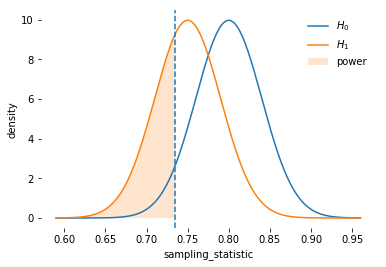

In [5]:
# one-tailed z-test
h_0 = 0.8
h_1 = 0.75

n = 100
se = np.sqrt(h_0 * (1 - h_0) / n)

power = compute_power(h_0, h_1, se, tail="left")
print("power: %.3f, beta: %.3f"%(power, 1 - power))

acceptance region [294.456, 305.544]
power: 0.942, beta: 0.058


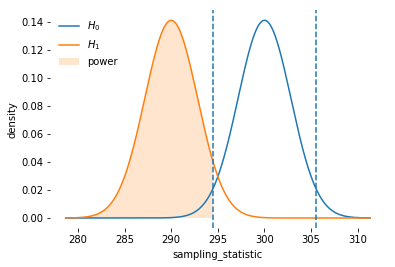

In [24]:
# two-tailed t-test
h_0 = 300
h_1 = 290

n = 50
se = 20 / np.sqrt(n)

power = compute_power(h_0, h_1, se, tail="two")
print("power: %.3f, beta: %.3f"%(power, 1 - power))

### One-sample


population_1 stats
mean 3.015
stf 2.465


population_2 stats
mean 4.003
stf 2.817



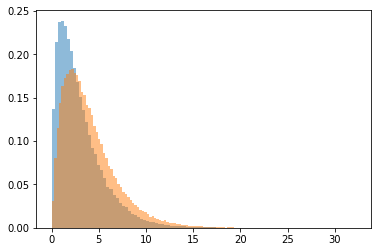

In [7]:
# population, mean 12, std 4, size 100k
population_1 = np.random.chisquare(3, 100000)
population_2 = np.random.chisquare(4, 100000)

print("""
population_1 stats
mean %.3f
stf %.3f
"""%(np.mean(population_1), np.std(population_1)))

print("""
population_2 stats
mean %.3f
stf %.3f
"""%(np.mean(population_2), np.std(population_2)))

plt.hist(population_1, bins=100, alpha=0.5, density=True)
plt.hist(population_2, bins=100, alpha=0.5, density=True)
plt.show()

acceptance region [2.291, 3.309]
power: 0.120, beta: 0.880


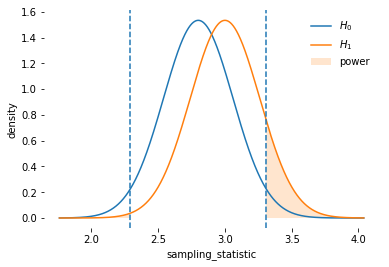

In [8]:
sample_size = 100
sample = np.random.choice(population_1, sample_size)

mu_0 = 2.8
mu = sample.mean()
se = sample.std(ddof=1) / np.sqrt(sample_size)

power = compute_power(mu_0, 3, se, tail="two")
print("power: %.3f, beta: %.3f"%(power, 1 - power))

In [9]:
from scipy import stats

p_vals = []
for _ in range(10000):
    sample = np.random.choice(population_1, sample_size)
    mu = 3
    se = sample.std(ddof=1) / np.sqrt(sample_size)
    t = (mu - mu_0) / se
    p = (1 - stats.t.cdf(abs(t), df=sample_size - 1)) * 2
    p_vals.append(p)

In [10]:
p

0.4650674817299749

In [11]:
np.mean((np.array(p_vals) < 0.05) | (np.array(p_vals) > 0.95))

0.0

### Two-sample

In [12]:
h_0 = 0

sample_size_1 = 100
sample_1 = np.random.choice(population_1, sample_size_1)

sample_size_2 = 100
sample_2 = np.random.choice(population_2, sample_size_2)

x = sample_1.mean() - sample_2.mean()
h_1 = 3.077 - 3.240

# note: sample_1.var() * (sample_size_1) == sample_1.var(ddof=1) * (sample_size_1 - 1)
total_ss = sample_1.var(ddof=1) * (sample_size_1 - 1) + sample_2.var(ddof=1) * (sample_size_2 - 1)
pooled_var = total_ss / (sample_size_1 + sample_size_2 - 2)
pooled_std = np.sqrt(pooled_var)

se = pooled_std * np.sqrt(1 / sample_size_1 + 1 / sample_size_2)

acceptance region [-0.725, 0.725]
power: 0.073, beta: 0.927


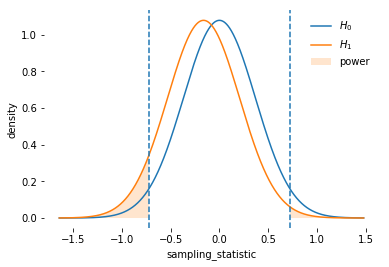

In [13]:
power = compute_power(h_0, h_1, se, tail="two")
print("power: %.3f, beta: %.3f"%(power, 1 - power))

### P-value

In [14]:
from scipy import stats as st

sample_size_1 = 300
sample_size_2 = 300

sample_1 = np.random.choice(population_1, sample_size_1)
sample_2 = np.random.choice(population_2, sample_size_2)

t, p_val = st.ttest_ind(sample_1, sample_2, equal_var=False)
print(t, p_val)

-3.001094035002278 0.0028026694997349906


In [15]:
ts = []
p_vals = []
sample_size_1 = 100
sample_size_2 = 100
for _ in range(10000):
    sample_1 = np.random.choice(population_1, sample_size_1)
    sample_2 = np.random.choice(population_2, sample_size_2)

    t, p_val = st.ttest_ind(sample_1, sample_2, equal_var=False)
    
    ts.append(t)
    p_vals.append(p_val)

np.mean((np.array(p_vals) < 0.05) | (np.array(p_vals) > 0.95))

0.7508

In [16]:
from sklearn.neighbors import KernelDensity

In [17]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

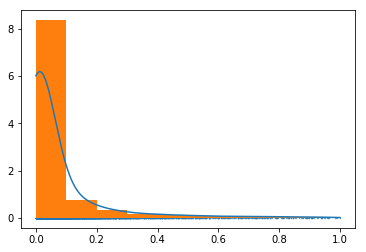

In [18]:
x = np.linspace(0, 1, 1000)
pdf = kde_sklearn(np.array(p_vals), x, bandwidth=0.05)
plt.plot(x, pdf)
plt.hist(p_vals, density=True)
plt.scatter(p_vals, [0] * len(p_vals), s=0.1)


t-statistic
mean = -2.662
std = 1.019



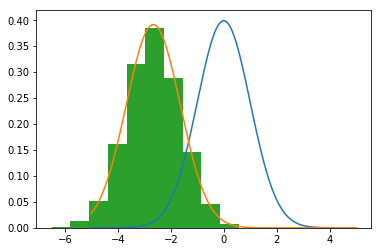

In [19]:
t_mean = np.mean(ts)
t_std = np.std(ts)

print("""
t-statistic
mean = %.3f
std = %.3f
"""%(t_mean, t_std))

x = np.linspace(-5, 5, 10000)
norm_0 = norm.pdf(x, loc=0, scale=1)
norm_1 = norm.pdf(x, loc=t_mean, scale=t_std)
plt.plot(x, norm_0, label='$h_0: %.2f$'%h_0)
plt.plot(x, norm_1, label='$h_0: %.2f$'%h_1)
plt.hist(ts, density=True)

plt.show()